In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Per dividere train e test set
from sklearn.impute import SimpleImputer # Per riempire i valori mancanti (es. età media)
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Per scalare numeri e convertire testo in numeri
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  # Più potente, gestisce meglio dati complessi
from sklearn.tree import DecisionTreeClassifier      # Semplice da visualizzare
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [27]:
df_train = pd.read_csv('train.csv', index_col=False)
df_test = pd.read_csv('test.csv', index_col=False)

In [28]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


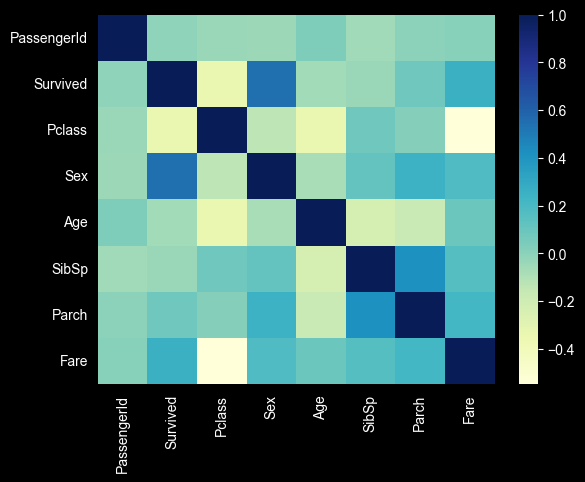

In [106]:
sns.heatmap(df_train.corr(numeric_only=True), cmap='YlGnBu')
plt.show()

In [30]:
gpb = df_train.groupby('Sex')['Survived'].mean()
gpb

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [31]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1}).astype(int)
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [32]:
imputer = SimpleImputer(strategy='median')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_train['Fare'] = imputer.fit_transform(df_train[['Age']])

In [42]:
feature = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X = df_train[feature]
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'rfc': RandomForestClassifier(n_estimators=100, random_state=42),
    'dtc': DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5),
    'knn': KNeighborsClassifier(n_neighbors=5)
}


In [60]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.1%}')

rfc Accuracy: 82.1%
dtc Accuracy: 79.9%
knn Accuracy: 75.4%


In [59]:
metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred)
}

for name, value in metrics.items():
    print(f"{name}: {value:.1%}")

accuracy: 75.4%
precision: 70.8%
recall: 68.9%
f1: 69.9%
